In [65]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [66]:
h = 0.01
x = np.arange(-1, 1, h)
y = np.arange(-1, 1, h)
X, Y = np.meshgrid(x, y)

In [67]:
R = np.sqrt(X**2 + Y**2)
# binaryBounds = ((R>=0.95) & (R<=1.15))
binaryBounds = R>=0.95

In [68]:
U = np.random.rand(*X.shape)*0.2
theta = np.arctan2(Y, X)
U[binaryBounds] = np.sin(7*theta[binaryBounds])

In [69]:
rho = -X-Y
poissonRegion = ~binaryBounds
row_indices, col_indices = np.where(poissonRegion)

In [70]:
# @njit("float64[:,:](float64[:,:],float64[:,:],float64[:,:],float64[:,:],float64[:,:],float64,float64)")
@njit("f8[:,:](f8[:,:],i8[:],i8[:],f8[:,:],f8,f8,i8)")
def finite_differences(rho,row_indices, col_indices,U,h,tolerance,iterations):
    u_new = np.copy(U)
    num = len(row_indices)
    for _ in range(iterations):
        for k in range(num):
            i = row_indices[k]
            j = col_indices[k]
            u_new[i, j] = 0.25 * (U[i+1, j] + U[i-1, j] +
                              U[i, j+1] + U[i, j-1] -
                              h**2 * 4*np.pi*rho[i, j])
        if np.trace(np.abs(U - u_new)) < tolerance:
            break
        U[...] = u_new
    return U

In [71]:
U = finite_differences(rho, row_indices, col_indices,U,h,1e-4,15000)

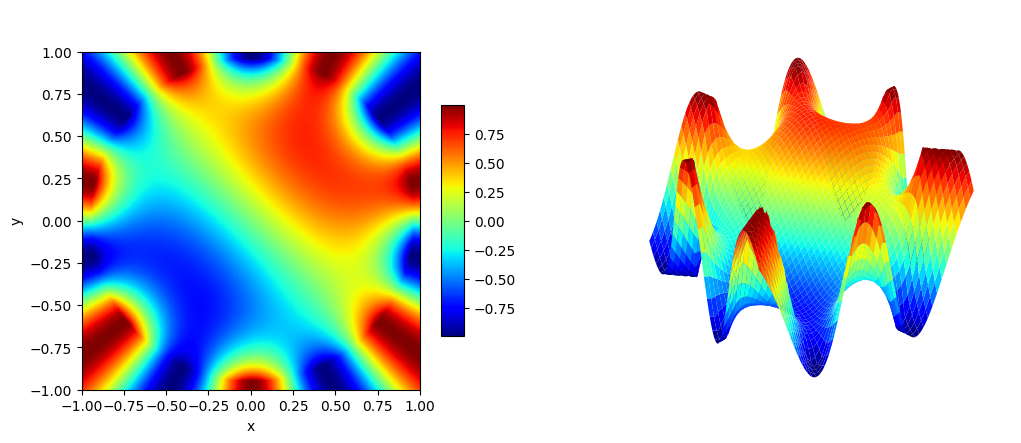

In [182]:
fig = plt.figure(figsize=(12, 10))
ax= fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
im = ax.imshow(U, extent=(-1, 1, -1, 1), origin='lower', cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
surf = ax2.plot_surface(X, Y, U, cmap='jet', edgecolor='none',linewidth=0, antialiased=True)
ax2.view_init(elev=40,azim=240)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.axis('off')
fig.colorbar(surf, ax=ax, shrink=0.3, aspect=10)
fig.savefig("1.png")